In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

# Horror Movie Survivors

In [2]:
#load data 
df = pd.read_csv('slasher.csv')
df.shape

(485, 3)

In [3]:
#preview
df.head()

,Unnamed: 0,gender,survival
0,1,Female,Survives
1,2,Female,Survives
2,3,Female,Survives
3,4,Female,Survives
4,5,Female,Survives


In [4]:
table = df.groupby(['gender', 'survival']).count()
table

Unnamed: 0
gender survival            
Female Dies             172
       Survives          50
Male   Dies             228
       Survives          35

In [5]:
#pull numbers from table
female_dies = table['Unnamed: 0'].iloc[0]
female_survivors = table['Unnamed: 0'].iloc[1]
male_dies = table['Unnamed: 0'].iloc[2]
male_survivors = table['Unnamed: 0'].iloc[3]

In [6]:
#calculate female survival rate
female_survival_rate = female_survivors/(female_survivors + female_dies) * 100
female_survival_rate

22.52252252252252

In [7]:
#calculate male survival rate
male_survival_rate = male_survivors/(male_survivors + male_dies) * 100
male_survival_rate

13.307984790874524

In [8]:
#calculated difference in survivor percentage
diff = female_survival_rate - male_survival_rate
diff

9.214537731647997

In [13]:
#shuffle 500 times randomly assigning survive or not to gender 
#record differences in survial rate in a dataframe
diffs = []
for i in range(500):
    #np.random.shuffle(df['survival'])
    df['survival'] = np.random.permutation(df['survival'].values)
    table = df.groupby(['gender', 'survival']).count()
    female_dies = table['Unnamed: 0'].iloc[0]
    female_survivors = table['Unnamed: 0'].iloc[1]
    male_dies = table['Unnamed: 0'].iloc[2]
    male_survivors = table['Unnamed: 0'].iloc[3]
    diff = female_survivors/(female_survivors + female_dies) - male_survivors/(male_survivors + male_dies)
    diffs.append(diff*100)

df2 = pd.DataFrame(diffs, columns =['diff'])
df2.head()

,diff
0,0.077073
1,-3.245641
2,-4.076320
3,-0.753605
4,-5.737677


In [14]:
df2.shape

(500, 1)

In [15]:
#stats from our shuffle
df2.describe()

,diff
count,500.000000
mean,-0.107337
std,3.358388
min,-9.891070
25%,-2.414962
50%,-0.338266
75%,2.569109
max,10.875895


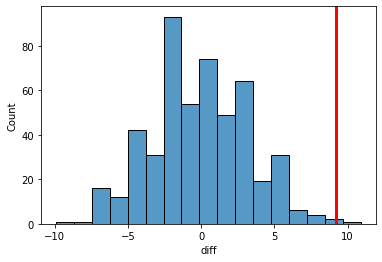

In [16]:
#plot results of shuffle, add red line for actual difference in survival percentage
plt = sns.histplot(data=df2, x='diff')
plt.axvline(9.2, 0,1, linewidth=3, color='r')

# Titanic Survivors

In [ ]:
#load data 
df = pd.read_csv('titanic.csv')
df.shape

In [ ]:
df.head()

In [ ]:
#calculate mean fare (ticket) price of survivor group and victim group
table = df.groupby(['survived'])['fare'].mean()
table

In [ ]:
#calculate difference in means
mean_vics = table.iloc[0]
mean_survives = table.iloc[1]
diff = mean_survives - mean_vics
diff

In [ ]:
#shuffle data 500 times and save the difference in means
#randomly assigning survival to each passenger
diffs = []
for i in range(500):
    df['survived'] = np.random.permutation(df['survived'].values)
    table = df.groupby(['survived'])['fare'].mean()
    mean_vics = table.iloc[0]
    mean_survives = table.iloc[1]
    diff = mean_survives - mean_vics
    diffs.append(diff)

df2 = pd.DataFrame(diffs, columns =['diff'])
df2.head()

In [ ]:
#plot the difference in means from shuffles (blue histogram) 
plt = sns.histplot(data=df2, x='diff')
#add red line marking the actual difference in the data
plt.axvline(27.42, 0,1, linewidth=3, color='r')

In [ ]:
df2['diff'].describe()

In [ ]:
#reloading titanic data since we shuffled the survivors
df = pd.read_csv('titanic.csv')
#List all the variables and check the datatypes.  "object" is categorical.  "int64" and "float64" are numerical 
df.dtypes